In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [4]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


In [7]:
qc.measure_all()
qc.draw()

┌─────────────────┐ statevector  ░ ┌─┐
     q: ┤ Initialize(0,1) ├──────░───────░─┤M├
        └─────────────────┘      ░       ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

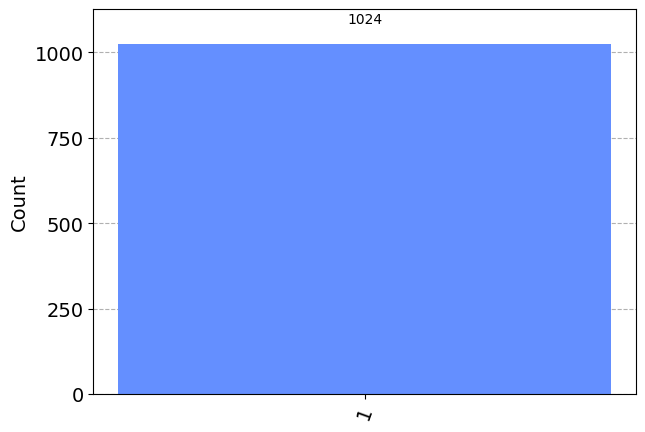

In [8]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [10]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


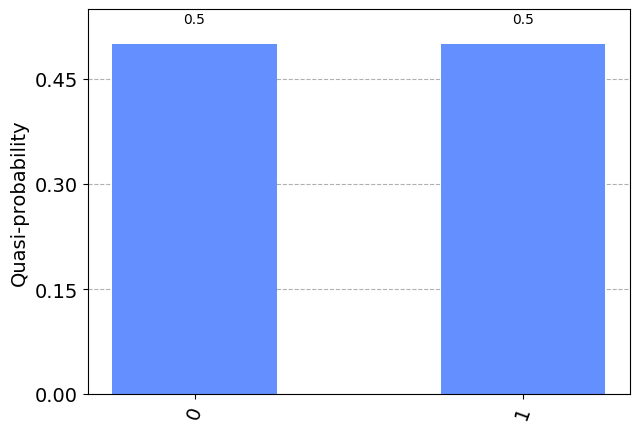

In [11]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

In [12]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [13]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

┌──────────────────────────────┐
q: ┤ Initialize(0.70711j,0.70711) ├
   └──────────────────────────────┘

In [14]:
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


In [15]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐ statevector 
     q: ┤ Initialize(0.70711j,0.70711) ├─░─┤M├──────░──────
        └──────────────────────────────┘ ░ └╥┘      ░      
meas: 1/════════════════════════════════════╩══════════════
                                            0

In [16]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


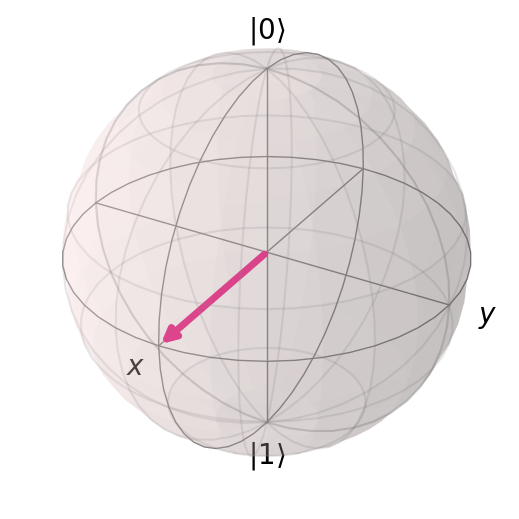

In [17]:
from qiskit.visualization import plot_bloch_vector
coords = [1,pi/2,0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

In [18]:
import qiskit.tools.jupyter
%qiskit_version_table